In [11]:
#import libraries needed
import numpy as np
import matplotlib.pyplot as plt

# Floating Point Arithmetic

## 1. 
The Machine epsilon $\epsilon$ is the distance between 1 and the next floating point number. 
Compute $\epsilon$, which is defined as the smallest floating point number such that it holds:
    $fl(1 + \epsilon) > 1$
    
Tips: use a while structure.

In [10]:
machine_epsilon = np.asarray([1],np.float32)

while 1.0 + machine_epsilon > 1.0:
    machine_epsilon = machine_epsilon/2

machine_epsilon = machine_epsilon*2     #it was half of the machine precision exiting the loop

print(f"Single precision: {machine_epsilon[0]}")


machine_epsilon = np.asarray([1],np.float64)

while 1.0 + machine_epsilon > 1.0:
    machine_epsilon = machine_epsilon/2

machine_epsilon = machine_epsilon*2     #it was half of the machine precision exiting the loop

print(f"Double precision: {machine_epsilon[0]}")


Single precision: 1.1920928955078125e-07
Double precision: 2.220446049250313e-16


The single precision floating point rapresentation has 32 bits, and the machine precision is therefore

$$P_{single}=2^{-23}=1.1920928955078125e-07$$

the double precision floating point rapresentation has 32 bits, and the machine precision is

$$P_{double}=2^{-52}=2.220446049250313e-16$$

---
## 2. 
Let's consider the sequence $a_n=(1+1/n)^n$. It is well known that: 

$\lim_{n \to \infty} a_n = e$

where e is the Euler costant. 
Choose different values for n, compute a_n and compare it to the real value of the Euler costant. 
What happens if you choose a large value of n? Guess the reason.

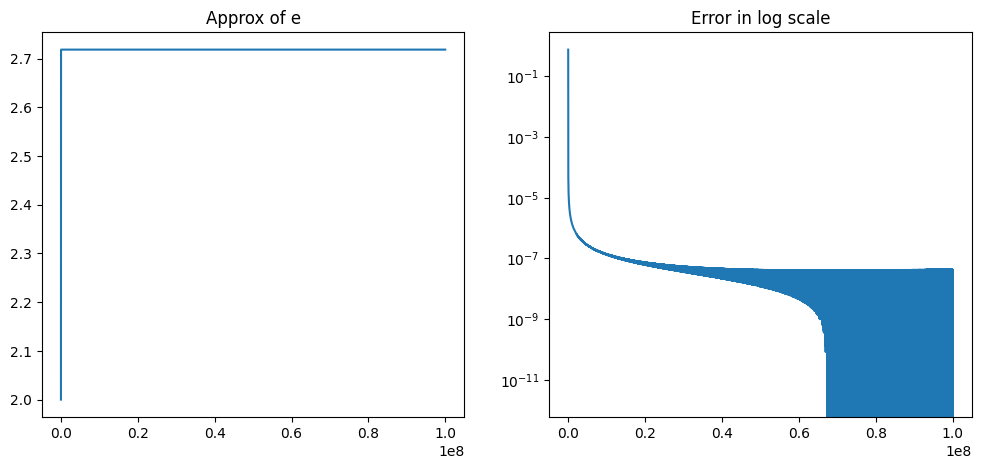

In [22]:
n_vector = np.arange(1, 100000000, 500)     #initialize the array with all the values for n
errors = []
e_ = []

for n in n_vector:
    a_n = (1 + 1/n)**n
    e_.append(a_n)
    errors.append((np.e - a_n))


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

plt.title('Approx of e')
plt.plot(n_vector, e_)

plt.subplot(1,2,2)

plt.title('Error in log scale')
plt.yscale("log")
plt.plot(n_vector, errors)
plt.show()

#Large value of n


The approximation improves for small values of n, but when n increases the approximation start to oscillate and doesn't converge to the real value of $e$.

We can try plotting the last values to try to understand the behaviour of the approximation

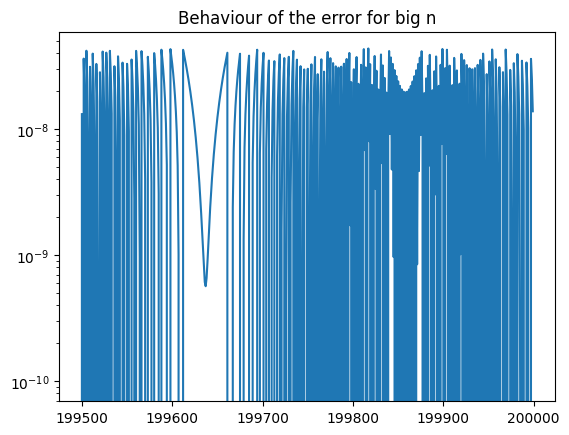

In [23]:
plt.title('Behaviour of the error for big n')
plt.yscale("log")
plt.plot(np.arange(len(errors)-500,len(errors)),errors[-500:])
plt.show()

The extimation is ocillating but doesen't converge.

We can observe that the error keeps oscillating around a certain value. The most probable explaination is that the error on the estimation $a_k$ become so big that the error between our estimation and the real value of $e$ stopped decreasing.

---
## 3.
Let’s consider the matrices:

$A=\begin{pmatrix}
4 & 2\\
1 & 3
\end{pmatrix}
,\;
B=\begin{pmatrix}
4 & 2\\
2 & 1
\end{pmatrix}$

Compute the rank of A and B and their eigenvalues. 
Are A and B full-rank matrices? 
Can you infer some relationship between the values of the eigenvalues and the full-rank condition? 
Please, corroborate your deduction with other examples.

Tips: Please, have a look at np.linalg.

In [25]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_B = np.linalg.eigvals(B)


print(f"A={A}")
print(f"Eigenvalues of A = {eigenvalues_A}")
print(f"Rank of A = {rank_A}")
if rank_A == 2:
    print("A is a full-rank matrix")
else:
    print("A is not a full-rank matrix")

print()

print(f"B={B}")
print(f"Eigenvalues of B = {eigenvalues_B}")
print(f"Rank of B = {rank_B}")
if rank_B == 2:
    print("B is a full-rank matrix")
else:
    print("B is not a full-rank matrix")


#A is a full rank matrix and all its eigenvalues are different from 0
#B is not a full rank matrix and not of its eigenvalues are different from 0


A=[[4 2]
 [1 3]]
Eigenvalues of A = [5. 2.]
Rank of A = 2
A is a full-rank matrix

B=[[4 2]
 [2 1]]
Eigenvalues of B = [5. 0.]
Rank of B = 1
B is not a full-rank matrix
1
[0. 3.]


From the theory we know that $rank(A)$ is the number of linearly indipendent column (or rows) of $A$. The square matrix is said to be full rank if the rank is equal to the dimension of the matrix.

The relation between the rank $r$ and the nuber of null eigenvalues $k$ is $n=r+k$, where $n$ is the dimension od the space.

<br>

We can show it with some other examples

In [27]:
A = np.array([[3,2,1],[4,5,2],[7,6,1]])
Eig = np.linalg.eigvals(A)
r = np.linalg.matrix_rank(A)

print(f"A={A}")
print(f"Eigenvalues of A = {Eig}")
print(f"Rank of A = {r}")

A=[[3 2 1]
 [4 5 2]
 [7 6 1]]
Eigenvalues of A = [ 9.29150262  1.         -1.29150262]
Rank of A = 3


In [32]:
B = np.array([[1,2,3],[0,0,0],[1,2,3]])
Eig = np.linalg.eigvals(B)
r = np.linalg.matrix_rank(B)

print(f"B={B}")
print(f"Eigenvalues of B = {Eig}")
print(f"Rank of B = {r}")

B=[[1 2 3]
 [0 0 0]
 [1 2 3]]
Eigenvalues of B = [0. 4. 0.]
Rank of B = 1


In [26]:
C = np.array([[1, 2], [1, 2]])
Eig = np.linalg.eigvals(C)
r = np.linalg.matrix_rank(C)

print(f"C = {C}")
print(f"Eigenvalues of C = {Eig}")
print(f"Rank of C = {r}")


C = [[1 2]
 [1 2]]
Eigenvalues of C = [0. 3.]
Rank of C = 1
